In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize': (18,6)})

In [49]:
df = pd.read_csv('data/marketing.csv',sep=';')

In [50]:
df.head()

,Sex,MaritalStatus,Age,Education,Occupation,YearsInSf,DualIncome,HouseholdMembers,Under18,HouseholdStatus,TypeOfHome,EthnicClass,Language,AnualIncome
1,2,1,5.0,4,5,5,3,3,0,Own,1,7,?,76004
2,Male,1,5.0,5,5,5,3,5,2,Own,1,7,1,76004
3,2,1,3.0,5,1,5,2,3,1,Rent,3,7,1,34000
4,2,5,1.0,2,6,5,1,4,2,Live with Parents/Family,1,7,1,9136
5,2,5,1.0,2,6,3,1,4,2,Live with Parents/Family,1,7,1,9136


In [51]:
#check null values in the data frame
df.isnull().values.any()

True

In [52]:
#columns that contains null values
df.isnull().sum()

Sex                  3
MaritalStatus        2
Age                  2
Education            1
Occupation          12
YearsInSf            0
DualIncome           0
HouseholdMembers     4
Under18              0
HouseholdStatus      3
TypeOfHome           0
EthnicClass          4
Language             1
AnualIncome          6
dtype: int64

In [53]:
#check unique values for each column
for col in df.columns:
    print('Column: {}, unique values: {}'.format(col, df[col].unique()))

Column: Sex, unique values: ['2' 'Male' '8' nan '9']
Column: MaritalStatus, unique values: ['1' '5' '3' '2' '4' '?' nan]
Column: Age, unique values: [ 5.  3.  1.  6.  2.  7.  4. nan]
Column: Education, unique values: ['4' '5' '2' '3' '6' nan '1' '?']
Column: Occupation, unique values: ['5' '1' '6' '8' '9' '3' '2' '?' nan '4' '7']
Column: YearsInSf, unique values: ['5' '3' '4' '2' '1' '?']
Column: DualIncome, unique values: [3 2 1]
Column: HouseholdMembers, unique values: ['3' '5' '4' '2' '1' nan '6' '?' '7' '8' '9']
Column: Under18, unique values: [0 2 1 3 4 5 6 8 7 9]
Column: HouseholdStatus, unique values: ['Own' 'Rent' 'Live with Parents/Family' nan '?' 'Rental'
 'Live with Parents' 'Live with Family' 'Live with Fam']
Column: TypeOfHome, unique values: ['1' '3' '5' '2' '4' '?']
Column: EthnicClass, unique values: ['7' '5' '2' '3' '8' '4' '1' '?' '6' nan]
Column: Language, unique values: ['?' '1' '2' '3' nan]
Column: AnualIncome, unique values: ['76004' '34000' '9136' '66994' '32171'

In [54]:
#replace all '?' values to null
df = df.replace({'?': np.nan})

In [55]:
#replace invalid values in 'Sex' column
df = df.replace({
    'Sex': {
        'Male': '1',
        '8': np.nan,
        '9': np.nan
    }
})

In [56]:
#remove the rows that cotain invalid values.
df = df.dropna()

In [57]:
#check columns that contains null values again
df.isnull().sum()

Sex                 0
MaritalStatus       0
Age                 0
Education           0
Occupation          0
YearsInSf           0
DualIncome          0
HouseholdMembers    0
Under18             0
HouseholdStatus     0
TypeOfHome          0
EthnicClass         0
Language            0
AnualIncome         0
dtype: int64

In [58]:
#descriptive statistics of the data
#mean, std, min, max
df.describe()

,Age,DualIncome,Under18
count,6845.000000,6845.000000,6845.000000
mean,3.407889,1.549744,0.688240
std,1.609857,0.737680,1.082828
min,1.000000,1.000000,0.000000
25%,2.000000,1.000000,0.000000
50%,3.000000,1.000000,0.000000
75%,4.000000,2.000000,1.000000
max,7.000000,3.000000,9.000000


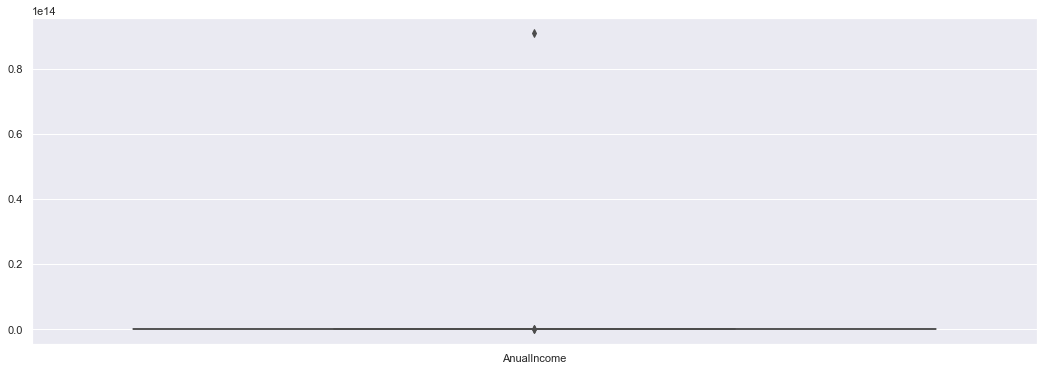

In [59]:
#boxplot of "AnualIncome" variable
sns.boxplot(data=df['AnualIncome'].to_frame())

In [60]:
#outlier in 'Anualicome'
df['AnualIncome'].unique()

array(['76004', '34000', '9136', '66994', '32171', '11703', '21672',
       '46894', '27591', '19997', '253600', '7', '7540', '91000000000036',
       '5740', '460', '2460', '9460', '150500', '75500'], dtype=object)

In [61]:
outliers = ['91000000000036','253600','150500']
df = df.loc[~df['AnualIncome'].isin(outliers),:]

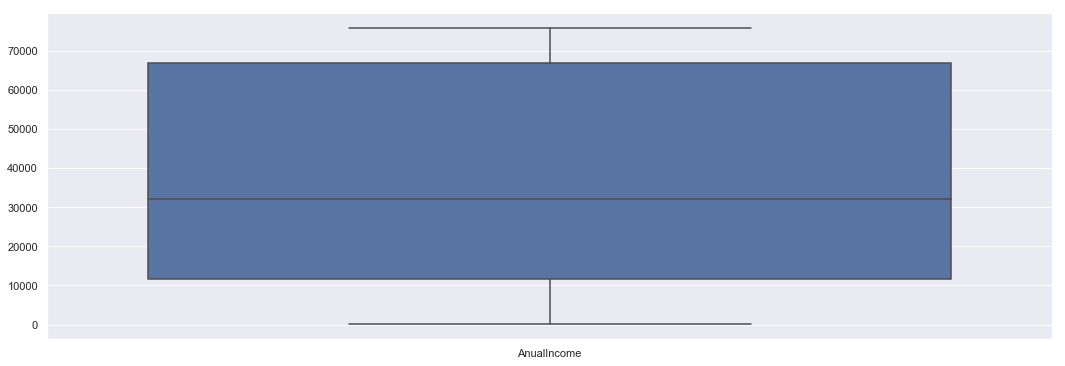

In [62]:
#boxplot of "AnualIncome" variable again
sns.boxplot(data=df['AnualIncome'].to_frame())

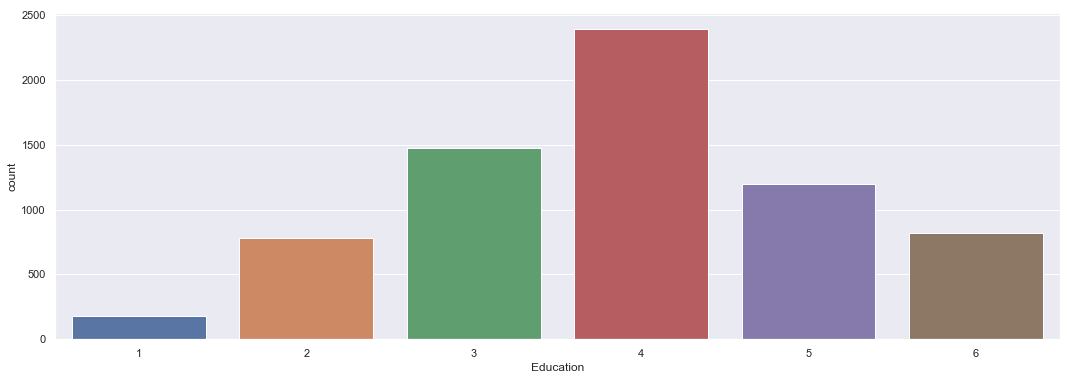

In [63]:
#countplot of Education variable
sns.countplot(x='Education', data=df)

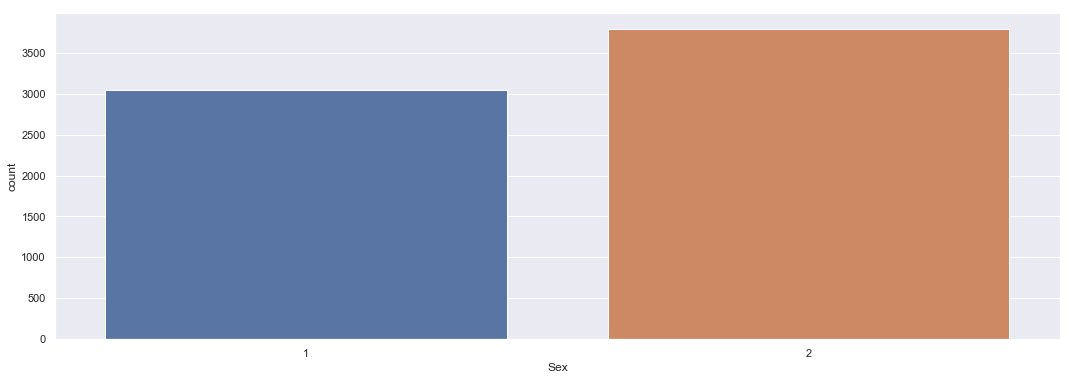

In [64]:
#countplot of Sex variable
sns.countplot(x='Sex', data=df)

In [65]:
#First 20 observations of 'Sex' and 'HouseholdStatus'
df[['Sex','HouseholdStatus']].head(20)

,Sex,HouseholdStatus
2,1,Own
3,2,Rent
4,2,Live with Parents/Family
5,2,Live with Parents/Family
6,1,Own
7,1,Rent
8,1,Rent
9,1,Rent
10,1,Rent
11,1,Rent


In [66]:
#'MaritalStatus' of the observations in position 247
df[['MaritalStatus']].iloc[[247]]

,MaritalStatus
328,1


In [67]:
#Number of males answered the survey
df.loc[df['Sex'] == '1']['Sex'].count()

3049

In [68]:
#Number of people "Live with Parents/Family"
df.loc[df['HouseholdStatus'] == 'Live with Parents/Family']['HouseholdStatus'].count()

1394

In [69]:
#Most common 'EthnicClass'
df['EthnicClass'].value_counts()

7    4577
5     870
3     630
2     379
8     175
1     111
6      88
4      12
Name: EthnicClass, dtype: int64

In [70]:
# parse AnualIncome as int
df['AnualIncome'] = df['AnualIncome'].apply(int)

In [71]:
# Occupation with highest anual income
df.groupby('Occupation')['Occupation', 'AnualIncome'].sum().sort_values(by='AnualIncome', ascending=False)

,AnualIncome
Occupation,
1,112422062
4,26058933
6,22635572
5,20808179
2,20156323
8,17567999
3,17262711
9,5489970
7,4075155
